<a href="https://colab.research.google.com/github/noahgift/MLConcepts/blob/main/Getting-Started-ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Concepts

### Key Statistical Concepts for ML



*   Correlation
*   Linear and Non-Linear Relationships



## Machine Learning Feedback Loop:  MLOps

* collecting data
* exploring (EDA) and preparing the data:  80% of the work
* training a model on the data
* evaluating model performance (deployment)
* Improving model performance, if needed
* Applying DevOps best practices:  Kaizen

![ML Pipeline Overview](https://user-images.githubusercontent.com/58792/35464450-d79e5804-02aa-11e8-84ba-77cee13af3c3.png)

#### High Level R ML Pipeline (Using Caret Library)




```r
#combine all data from facebook, twitter and wikipedia
combined_model <- function(analytics_file){
	fb_data <- clean_facebook_data(analytics_file,10,10)
	tw_data <- clean_twitter_data(analytics_file,10)
	wiki_data <- clean_wikipedia(analytics_file, 3)
	combined <- merge(fb_data,tw_data,by='author_id')
	combined <- merge(combined,wiki_data,by='author_id')
	return(combined)
}

#determine knn clustering from combined model
caret_knn <- function(knn_set, observed){
	knnFit <- train(knn_set, observed,
                method="knn", preProc=c("center", "scale"),
                tuneLength = 30,trainControl(method="cv"))
	return(knnFit)
}


#Read in the data, clean it up, and create test and training set
prepare_network_data <- function(analytics_file, desired_cols, post_col) {
    data <- clean_data(analytics_file, desired_cols, post_col, min_posts=10)

    #Add grouping column by finding rows
    data$gp <- runif(dim(data)[1])
    test_set <- subset(data, gp <= 0.2)
    training_set <- subset(data, gp > 0.2)
    network_metadata <- list(data,test_set, training_set)
    return(network_metadata)
}

#calculates Mean Absolute Error
MAE <- function(actual, predicted){
    result <- mean(abs(actual - predicted))
    return(result)
}
```



In [ ]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns; sns.set(color_codes=True)
from sklearn.cluster import KMeans
color = sns.color_palette()
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline
df = pd.read_csv("https://raw.githubusercontent.com/noahgift/ucdmsba-machine-learning/master/data/celebrity_rank.csv")
df.head(10)

,twitter_rank,facebook_rank,other_rank,page_views,number_of_posts,median_page_views_post,cum pageviews,total pageviews,cum percentage pageviews
0,59,6,45,238871,59,943.000,238871,1932905,12.36%
1,52,7,159,169154,119,675.500,408025,1932905,21.11%
2,3,2,153,165224,13,9448.000,573249,1932905,29.66%
3,1,3,152,118696,10,10761.000,691945,1932905,35.80%
4,10,4,154,107180,7,5864.000,799125,1932905,41.34%
5,6,30,156,94387,31,1265.000,893512,1932905,46.23%
6,2,35,155,92604,31,2604.000,986116,1932905,51.02%
7,38,19,165,78262,24,252.000,1064378,1932905,55.07%
8,11,5,126,46037,14,1864.500,1110415,1932905,57.45%
9,75,10,163,42456,45,419.000,1152871,1932905,59.64%


### Non-Linear Relationship Doesn't Work Great with Vanilla Linear Regression



* One reason why 80% of the time should be spent in EDA and collection
* Need to have enough data
* Need to know shape of data:  linear...or non-linear?
* Be humble, especially with money or people's lives at stake

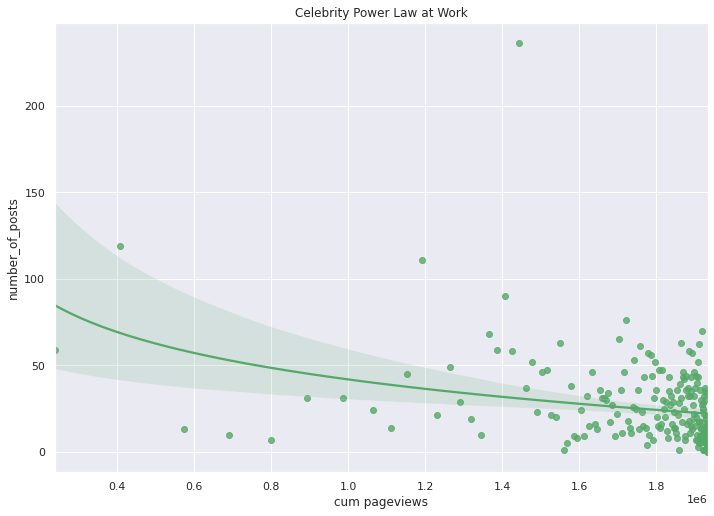

In [ ]:
fig, ax = plt.subplots()
ax.set_title('Celebrity Power Law at Work')
fig.set_size_inches(11.7, 8.27)
sns.regplot(x=df["cum pageviews"], y=df["number_of_posts"], color="g",logx=True, ax=ax)


#### What Happened In Real Life to Prediction Model

## (Note Millions of Dollars are behind this model!)
![Predicted vs Actual](https://user-images.githubusercontent.com/58792/35465715-e5de43c2-02b2-11e8-9a9e-104d9eca387e.png)

#### Actual Pageviews After ML Model Goes Live
![Actual Pageviews](https://user-images.githubusercontent.com/58792/35465722-f077040e-02b2-11e8-87bf-1a17426b7dcb.png)


#### AI/ML Product Development

### Good example of clustering business use case in Action
### Works as a companion to ML model (helping explain it further)
![ML Web Appplication](https://user-images.githubusercontent.com/58792/35465731-fa6d6c28-02b2-11e8-8d9d-af142a5448e2.png)


## Linear Regression

### Linear Regression is the 800 lb Gorilla prediction

* Never a bad place to start
* Can even think about linear regression as a form of EDA
* Even against some non-linear data it performs ok


#### What is linear regression used for?



* One view of machine learning is that ML consists of development of regression models with the Prediction goal
(matloff)
* Predicting a continuous variable
* Forecasting the future

![Linear Regression](http://scikit-learn.org/stable/_images/sphx_glr_plot_ols_001.png)

#### Libraries for ML based Linear Regression


* In Python [scikit-learn](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html).  Many different techniques to explore.

- Ordinary Least Squares
- Ridge Regression
- Lasso
- Bayesian Regression
- Robustness regression

* In R [Caret](https://topepo.github.io/caret/model-training-and-tuning.html)
- knnRegression
- (too many to mention)
- Lots of help with [splitting data](https://topepo.github.io/caret/data-splitting.html)




##### Biggest Takeaways from classic linear regression

* Use cross-fold validation techniques
* Judge performance using metrics like RMSE (Root Mean Square Error) vs R-Squared and P-Value

## Clustering

Unsupervised Machine Learning technique that discovers hidden labels

#### Exploration of Zillow Home Prices 
